### Importing Libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

### Load Data

In [207]:
df = pd.read_csv('data_for_lr.csv')

In [208]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [210]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [211]:
df[df.duplicated()]

,x,y


### Data Processing

In [212]:
df.dropna(inplace = True)

In [213]:
print('Shape of data : ', df.shape)

Shape of data :  (699, 2)


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splitiing Data

In [215]:
# Training input and output

train_input  = np.array(df.x[:500]).reshape(500,1)
train_output = np.array(df.y[:500]).reshape(500,1)

# validation data input and output

test_input  = np.array(df.x[500:700]).reshape(199,1)
test_output = np.array(df.y[500:700]).reshape(199,1)

In [216]:
print(f'Training input data  : {train_input.shape}')
print(f'Training output data : {train_output.shape}')
print(f'Testing input data   : {test_input.shape}')
print(f'Testing output data  : {test_output.shape}')

Training input data  : (500, 1)
Training output data : (500, 1)
Testing input data   : (199, 1)
Testing output data  : (199, 1)


# <font color = "green">Linear Regression</font>

## Forward Propagation

f(x) = m*x + c

In [192]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

## Cost Function

summation(1/2n * (y - f(X))^2)

In [193]:
def cost_function(predictions, train_output):
    
    cost = np.mean((predictions - train_output) **2) * 0.5
    
    return cost

## Gradient Descent for Back Proapagation

df = (f(x) - y)/n

dm = df * x

dc = df * 1

In [194]:
def back_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Update parameters

In [195]:
def update_parameters(parameters, derivatives, learning_rate):
    
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

## Model Training

In [196]:
def train(train_input, train_output, learning_rate, iters):
    
    # random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    plt.figure
    
    #loss
    loss = list()
    
    # iteration
    for i in range(iters):
        
        # forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        # cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f'Iteration = {i+1}, Loss = {cost}')
        
        # plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label = 'Original')
        ax.plot(train_input, predictions, '*', label = 'Training')
        
        legend = ax.legend()
        
        ax.plot(train_input, train_output, '+', label = 'Original')
        ax.plot(train_input, predictions, '*', label = 'Training')
        plt.show()
        
        # back propagation
        derivatives = back_propagation(train_input, train_output, predictions)
        
        # update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
    
    return parameters, loss

Iteration = 1, Loss = 259.0802696848795


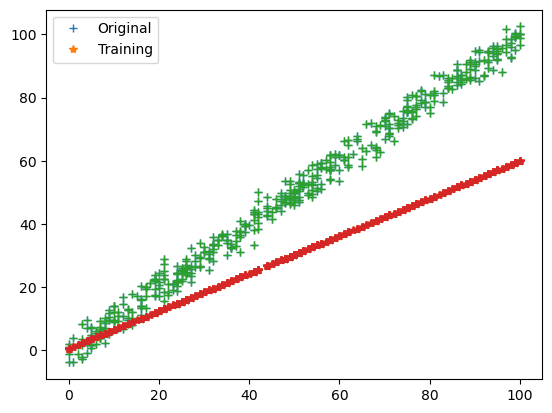

Iteration = 2, Loss = 119.72583685974945


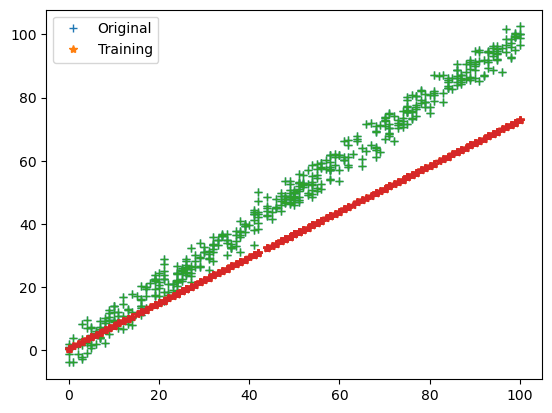

Iteration = 3, Loss = 56.50057408532102


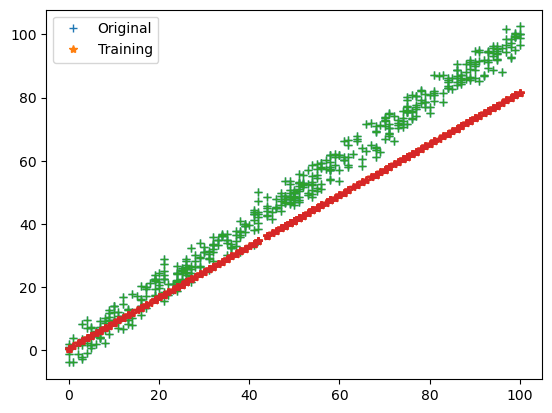

Iteration = 4, Loss = 27.81520008681555


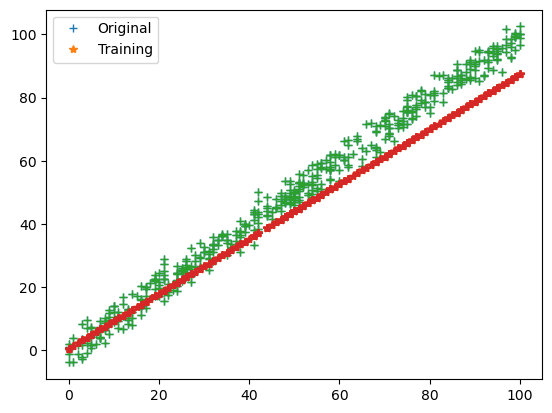

Iteration = 5, Loss = 14.800611883863738


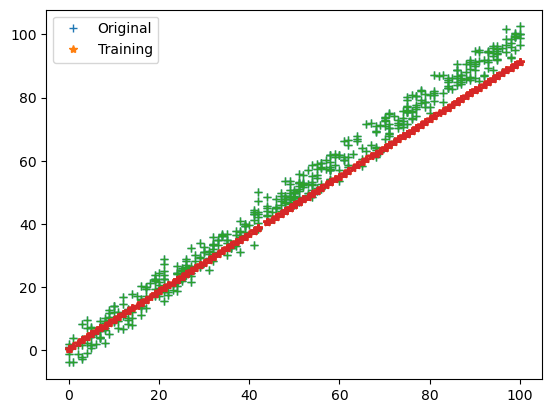

Iteration = 6, Loss = 8.895876554076


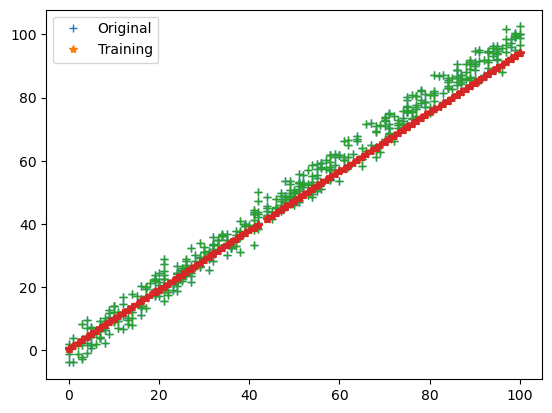

Iteration = 7, Loss = 6.2168893481220815


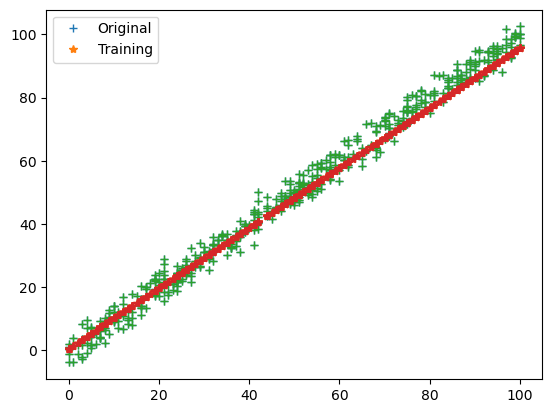

Iteration = 8, Loss = 5.001427639036292


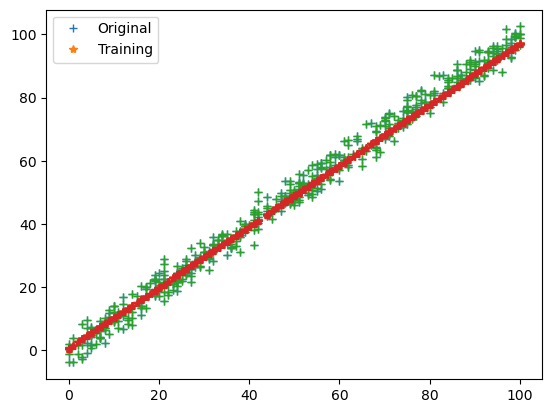

Iteration = 9, Loss = 4.449969069053878


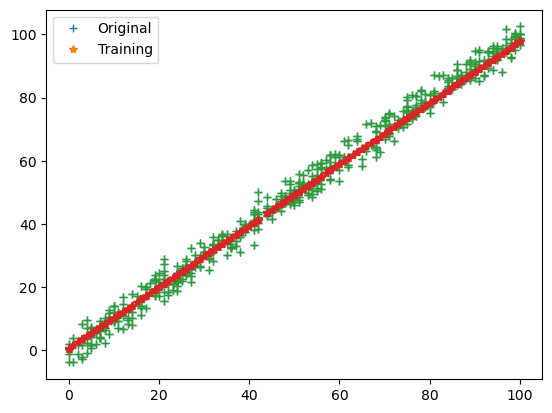

Iteration = 10, Loss = 4.199769458873061


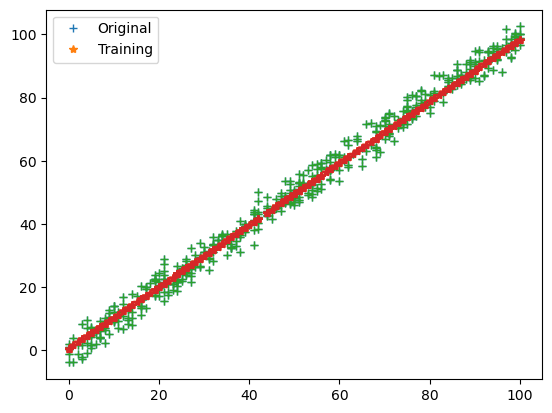

Iteration = 11, Loss = 4.086251372554224


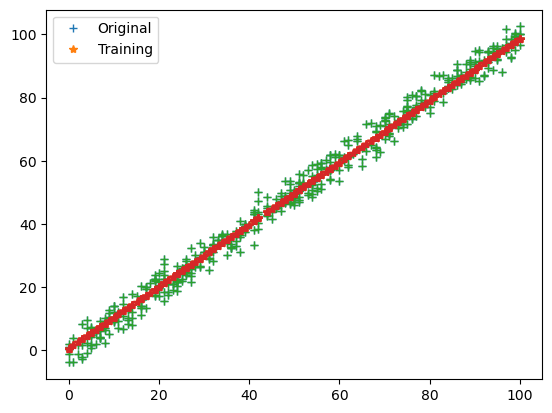

Iteration = 12, Loss = 4.0347458451187865


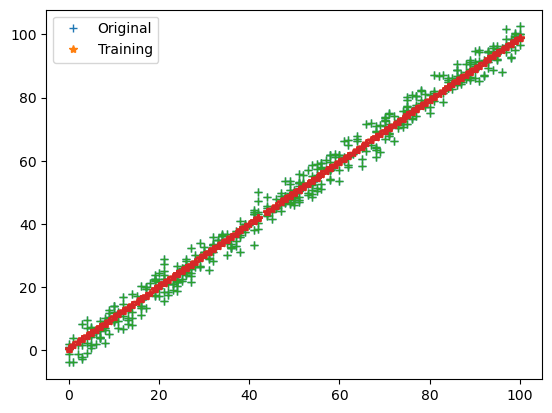

Iteration = 13, Loss = 4.011375484449556


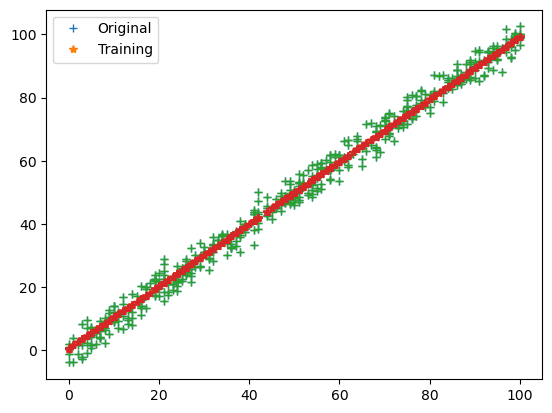

Iteration = 14, Loss = 4.000770080218951


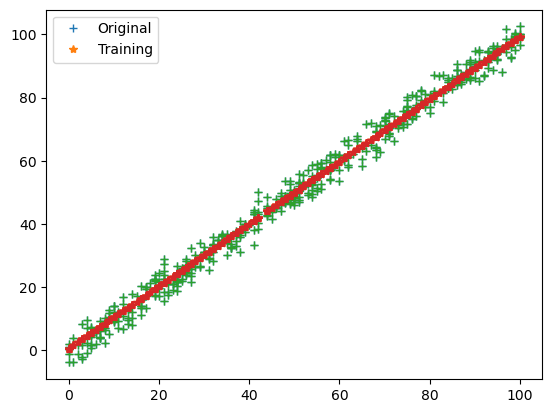

Iteration = 15, Loss = 3.9959561509766686


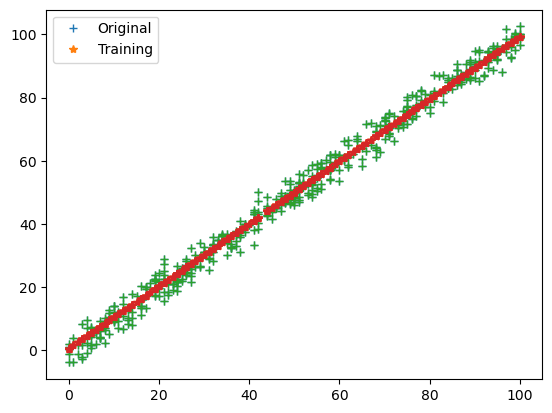

Iteration = 16, Loss = 3.9937698204645793


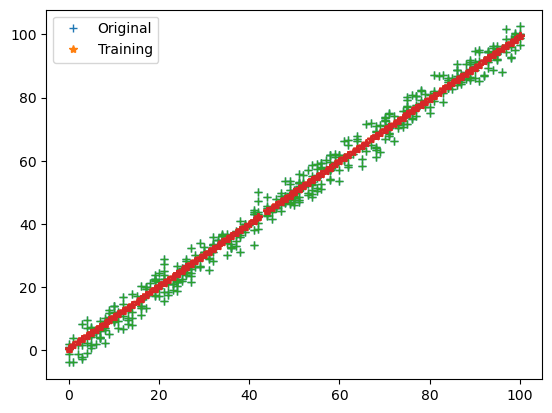

Iteration = 17, Loss = 3.9927756345199295


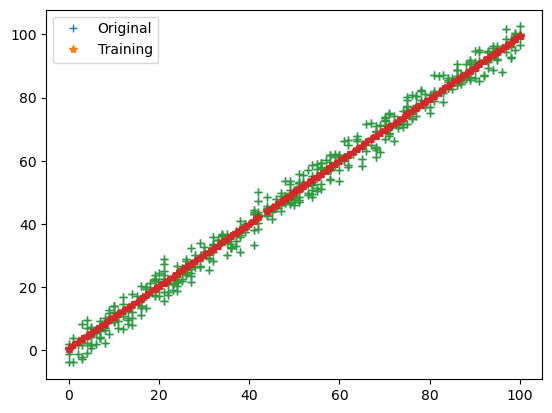

Iteration = 18, Loss = 3.992322325999103


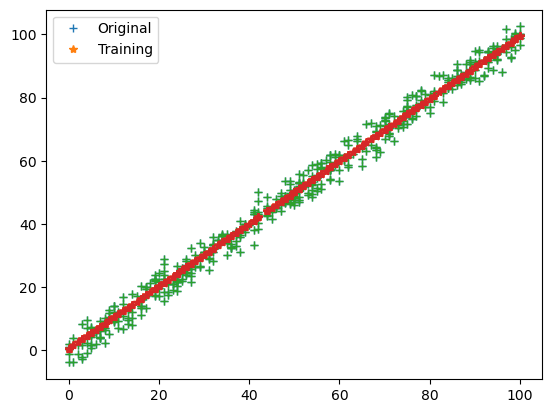

Iteration = 19, Loss = 3.992114414277662


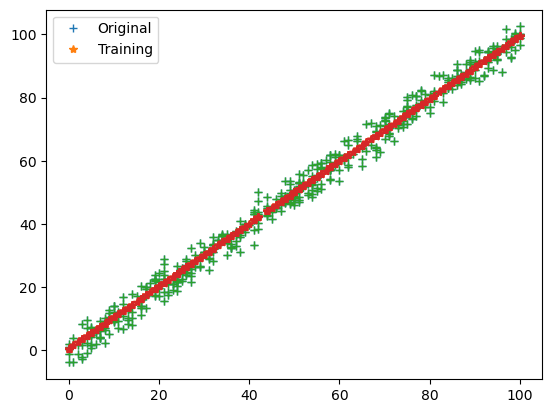

Iteration = 20, Loss = 3.992017839469011


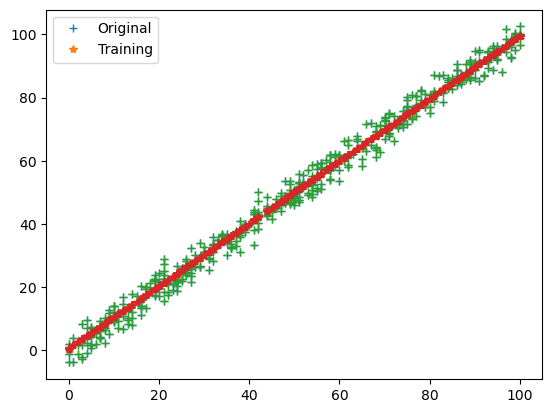

In [197]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [198]:
print('Parameters : ', parameters)

Parameters :  {'m': 0.9886682949928227, 'c': 0.5687115298763312}


In [199]:
loss

[259.0802696848795,
 119.72583685974945,
 56.50057408532102,
 27.81520008681555,
 14.800611883863738,
 8.895876554076,
 6.2168893481220815,
 5.001427639036292,
 4.449969069053878,
 4.199769458873061,
 4.086251372554224,
 4.0347458451187865,
 4.011375484449556,
 4.000770080218951,
 3.9959561509766686,
 3.9937698204645793,
 3.9927756345199295,
 3.992322325999103,
 3.992114414277662,
 3.992017839469011]

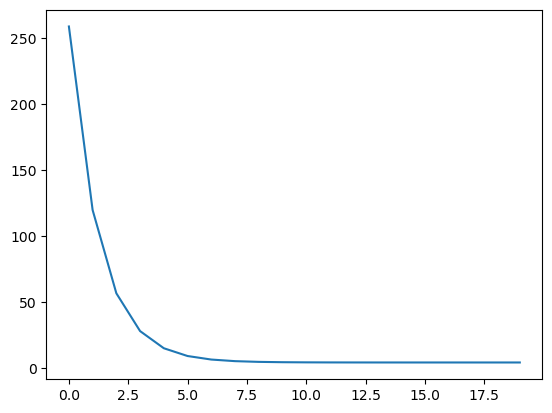

In [200]:
plt.plot(loss)

## Let's Predict

In [201]:
test_predictions = test_input * parameters['m'] + parameters['c']

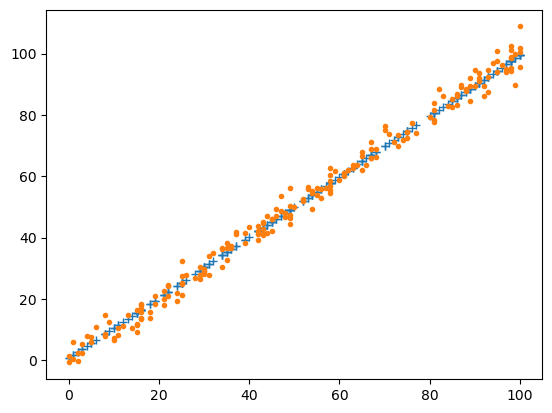

In [202]:
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '.')
plt.show()

## Cost of Prediction

In [205]:
cost_function(test_output, test_predictions)

4.009462840344636